# Convolutional Neural Network (CNN)

CNN's are the class of artificial neural networks that works well with images classification and computer vision tasks. In 2010 following the computational breakthrough of using GPUs for NN training, CNNs sparked the third wave of neural networks. 

We will be using FashionMNIST dataset as an example to explore the inner workings of CNN. The CNN model is built with pytorch.

This notebook is my CNN learning referencing the following resources
1) https://www.datacamp.com/tutorial/convolutional-neural-networks-python
2) https://www.datacamp.com/tutorial/cnn-tensorflow-python


In [1]:
import numpy as np
import pandas as pd

# pytorch
import torch
import torch.nn as nn
# import torch.optim as optim
# import torch.nn.functional as F
import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms

import matplotlib.pyplot as plt
# from tqdm import tqdm
from tqdm.notebook import tqdm

# tensorflow and keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam



## Globals

In [2]:
BATCH_SIZE = 64
EPOCHS = 20
# LEARNING_RATE = 0.001 EPOCHS = 5

## Load Data

Load FashionMNIST data from the pytorch datasets. Load it into train and test loaders

In [3]:
# Download the data
train_dataset = datasets.FashionMNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = datasets.FashionMNIST(root='./data', train=False, transform=transforms.ToTensor(), download=True)

# Create train and test loaders
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=BATCH_SIZE, shuffle=False)


In [4]:
# train_loader.dataset.data.shape
print("Shape of the training data", train_dataset.data.shape, train_dataset.targets.shape)
print("Shape of the test data", test_dataset.data.shape, test_dataset.targets.shape)


Shape of the training data torch.Size([60000, 28, 28]) torch.Size([60000])
Shape of the test data torch.Size([10000, 28, 28]) torch.Size([10000])


In [5]:
classes = np.unique(train_dataset.targets)
nclasses = len(classes)

print('Classes: ', classes)
print('Number of classes: ', nclasses)

Classes:  [0 1 2 3 4 5 6 7 8 9]
Number of classes:  10


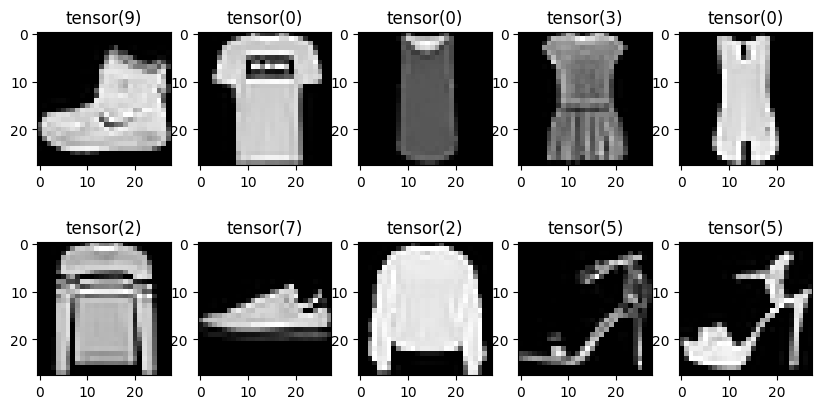

In [6]:
# Plot the first 10 images
plt.figure(figsize=(10, 5))

for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(train_dataset.data[i], cmap='gray')
    plt.title(train_dataset.targets[i])

# Model

In [7]:
class CNN(nn.Module):
    def __init__(self, in_channels, nfeats, device="cpu"):
        super(CNN, self).__init__()
        self.device = device
        self.conv1 = nn.Conv2d(in_channels=in_channels, out_channels=32, kernel_size=3, padding="same") # 1x28x28 -> 32x28x28
        self.act1 = nn.LeakyReLU(negative_slope=0.1)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2, padding=0) # 32x28x28 -> 32x14x14
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding="same") # 32x14x14 -> 64x14x14
        self.act2 = nn.LeakyReLU(negative_slope=0.1)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2, padding=0) # 64x14x14 -> 64x7x7
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding="same") # 64x7x7 -> 128x7x7
        self.act3 = nn.LeakyReLU(negative_slope=0.1)
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2, padding=0) # 128x7x7 -> 128x3x3
        self.flatten = nn.Flatten() # 128x3x3 -> 128*3*3
        self.fc1 = nn.Linear(in_features=128*3*3, out_features=128)
        self.act4 = nn.LeakyReLU(negative_slope=0.1)
        self.fc2 = nn.Linear(in_features=128, out_features=nfeats)
        
    def forward(self, x):
        x = x.to(self.device)
        x = self.conv1(x)
        # print("After conv1: ", x.shape)
        x = self.act1(x)
        # print("After act1: ", x.shape)
        x = self.pool1(x)
        # print("After pool1: ", x.shape)
        x = self.conv2(x)
        # print("After conv2: ", x.shape)
        x = self.act2(x)
        # print("After act2: ", x.shape)
        x = self.pool2(x)
        # print("After pool2: ", x.shape)
        x = self.conv3(x)
        # print("After conv3: ", x.shape)
        x = self.act3(x)
        x = self.pool3(x)
        # print("After pool3: ", x.shape)
        x = self.flatten(x)
        # print("After flatten: ", x.shape)
        x = self.fc1(x)
        x = self.act4(x)
        x = self.fc2(x)
        return x
    
    
        
        
        
        
        
        
        


In [8]:
# select device
# device = "cuda" if torch.cuda.is_available() else ("mps" if torch.backends.mps.is_built() else "cpu")
device = "cpu"
print("using device: ", device)
# create model
model = CNN(in_channels=1, nfeats=nclasses, device=device)
print(model)

# loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

using device:  cpu
CNN(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (act1): LeakyReLU(negative_slope=0.1)
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (act2): LeakyReLU(negative_slope=0.1)
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (act3): LeakyReLU(negative_slope=0.1)
  (pool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=1152, out_features=128, bias=True)
  (act4): LeakyReLU(negative_slope=0.1)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)


In [9]:
for epoch in range(EPOCHS):
 # Iterate over training batches
   print(f"Epoch [{epoch + 1}/{EPOCHS}]")

   for batch_index, (data, targets) in enumerate(tqdm(train_loader)):
       data = data.to(device)
       targets = targets.to(device)
      #  print("data shape: ", data.shape)
       scores = model(data)
       loss = criterion(scores, targets)
       optimizer.zero_grad()
       loss.backward()
       optimizer.step()
      #  break
  #  break

Epoch [1/20]


  0%|          | 0/938 [00:00<?, ?it/s]

Epoch [2/20]


  0%|          | 0/938 [00:00<?, ?it/s]

Epoch [3/20]


  0%|          | 0/938 [00:00<?, ?it/s]

Epoch [4/20]


  0%|          | 0/938 [00:00<?, ?it/s]

Epoch [5/20]


  0%|          | 0/938 [00:00<?, ?it/s]

Epoch [6/20]


  0%|          | 0/938 [00:00<?, ?it/s]

Epoch [7/20]


  0%|          | 0/938 [00:00<?, ?it/s]

Epoch [8/20]


  0%|          | 0/938 [00:00<?, ?it/s]

Epoch [9/20]


  0%|          | 0/938 [00:00<?, ?it/s]

Epoch [10/20]


  0%|          | 0/938 [00:00<?, ?it/s]

Epoch [11/20]


  0%|          | 0/938 [00:00<?, ?it/s]

Epoch [12/20]


  0%|          | 0/938 [00:00<?, ?it/s]

Epoch [13/20]


  0%|          | 0/938 [00:00<?, ?it/s]

Epoch [14/20]


  0%|          | 0/938 [00:00<?, ?it/s]

Epoch [15/20]


  0%|          | 0/938 [00:00<?, ?it/s]

Epoch [16/20]


  0%|          | 0/938 [00:00<?, ?it/s]

Epoch [17/20]


  0%|          | 0/938 [00:00<?, ?it/s]

Epoch [18/20]


  0%|          | 0/938 [00:00<?, ?it/s]

Epoch [19/20]


  0%|          | 0/938 [00:00<?, ?it/s]

Epoch [20/20]


  0%|          | 0/938 [00:00<?, ?it/s]

In [10]:
model.eval()
with torch.no_grad():
    num_correct = 0
    num_samples = 0
    for x, y in test_loader:
        x = x.to(device)
        y = y.to(device)
        preds = model(x)
        _, preds = preds.max(1)
        num_correct += (preds == y).sum()
        num_samples += preds.size(0)

    print(f"Got {num_correct}/{num_samples} with accuracy {float(num_correct)/float(num_samples)*100:.2f}")
    # model.train()


Got 9223/10000 with accuracy 92.23


# Test Area

**nn.Conv2d**

The convolution layer performs the colvolution operation between input image and kernel. This convolution operation helps in extracting the features from the image via different kernels. The number of kernels is specified by number of output channels.

In [73]:
# Define a Conv2d layer
conv = nn.Conv2d(
    in_channels=3,    # Input channels (e.g., RGB image)
    out_channels=16,  # Number of filters
    kernel_size=3,     # 3x3 kernel
    stride=1,          # Step size
    padding="same",         # Pad input to maintain spatial dimensions
)

# Example input (batch_size=1, channels=3, height=32, width=32)
input_tensor = torch.randn(1, 3, 32, 32)

# Forward pass
output = conv(input_tensor)

print("Input shape:", input_tensor.shape)  # torch.Size([1, 3, 32, 32])
print("Output shape:", output.shape)      # torch.Size([1, 16, 32, 32])

Input shape: torch.Size([1, 3, 32, 32])
Output shape: torch.Size([1, 16, 32, 32])


**nn.MaxPool2d**

This layer downsamples the features extracted by convolution layer. This has a kernal (a sliding window) which picks the max value of the window. Thus it reduces the spacial dimension while retaining important details of extracted features from the convolution layer.

In [77]:
# Define MaxPool2d layer (downsamples by 2x)
maxpool = nn.MaxPool2d(
    kernel_size=2,   # 2x2 window
    stride=2,       # Step size (default = kernel_size)
)

# Example input (batch_size=1, channels=16, height=32, width=32)
input_tensor = torch.randn(1, 16, 32, 32)

# Forward pass
output = maxpool(input_tensor)

print("Input shape:", input_tensor.shape)  # torch.Size([1, 16, 32, 32])
print("Output shape:", output.shape)      # torch.Size([1, 16, 16, 16])

Input shape: torch.Size([1, 16, 32, 32])
Output shape: torch.Size([1, 16, 16, 16])


In [76]:
train_dataset.data.shape

torch.Size([60000, 28, 28])